In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
df=pd.read_excel('Data_Train.xlsx')

In [4]:
df ## poora ka poora data categorial hai
# review ko extract
# number of reviews aur price ka hisaab kitaab
# author ko one hot encode krke
# title ki jrurat nahi (ya fir imp words ko dekh ke.)
# edition (year) + paperback / hardcover
# Genre mei pehle value_counts() aur genre ko bhi use krna hai
# Category ko bhi encode krna.

# PEHLE SABKO NORMALIZE KARR LO, taaki anuj aur Anuj same hi ho.


,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62
...,...,...,...,...,...,...,...,...,...
6232,Humans: A Brief History of How We F*cked It Al...,Tom Phillips,"Paperback,– 8 Aug 2018",5.0 out of 5 stars,2 customer reviews,'F*cking brilliant' Sarah Knight\n'Very funny'...,Anthropology (Books),Humour,322.00
6233,The Chemist,Stephenie Meyer,"Paperback,– 21 Nov 2016",3.3 out of 5 stars,9 customer reviews,"In this gripping page-turner, an ex-agent on t...",Contemporary Fiction (Books),"Crime, Thriller & Mystery",421.00
6234,The Duke And I: Number 1 in series (Bridgerton...,Julia Quinn,"Paperback,– 8 Jun 2006",3.8 out of 5 stars,3 customer reviews,'The most refreshing and radiant love story yo...,Romance (Books),Romance,399.00
6235,Frostfire (Kanin Chronicles),Amanda Hocking,"Paperback,– 15 Jan 2015",3.5 out of 5 stars,4 customer reviews,Frostfire by Amanda Hocking is the stunning fi...,Action & Adventure (Books),Action & Adventure,319.00


In [5]:
test=pd.read_excel('Data_Test.xlsx')

In [6]:
test.head() # price predict krna hai

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",4.4 out of 5 stars,960 customer reviews,A collection of entire body of work of the She...,Short Stories (Books),"Crime, Thriller & Mystery"
1,Learn Docker - Fundamentals of Docker 18.x: Ev...,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",5.0 out of 5 stars,1 customer review,Enhance your software deployment workflow usin...,Operating Systems Textbooks,"Computing, Internet & Digital Media"
2,Big Girl,Danielle Steel,"Paperback,– 17 Mar 2011",5.0 out of 5 stars,4 customer reviews,"'Watch out, world. Here I come!'\nFor Victoria...",Romance (Books),Romance
3,Think Python: How to Think Like a Computer Sci...,Allen B. Downey,"Paperback,– 2016",4.1 out of 5 stars,11 customer reviews,"If you want to learn how to program, working w...",Programming & Software Development (Books),"Computing, Internet & Digital Media"
4,Oxford Word Skills: Advanced - Idioms & Phrasa...,Redman Gairns,"Paperback,– 26 Dec 2011",4.4 out of 5 stars,9 customer reviews,"Learn and practise the verbs, prepositions and...",Linguistics (Books),"Language, Linguistics & Writing"


In [7]:
df['BookCategory'].value_counts() # an weights be assigned to books category. dekhte hai category 

Action & Adventure                      818
Crime, Thriller & Mystery               723
Biographies, Diaries & True Accounts    596
Language, Linguistics & Writing         594
Comics & Mangas                         583
Romance                                 560
Humour                                  540
Arts, Film & Photography                517
Computing, Internet & Digital Media     510
Sports                                  471
Politics                                325
Name: BookCategory, dtype: int64

In [8]:
test['BookCategory'].value_counts()

Action & Adventure                      218
Comics & Mangas                         161
Crime, Thriller & Mystery               155
Sports                                  143
Romance                                 142
Language, Linguistics & Writing         139
Computing, Internet & Digital Media     138
Biographies, Diaries & True Accounts    136
Humour                                  130
Arts, Film & Photography                121
Politics                                 77
Name: BookCategory, dtype: int64

In [9]:
df.groupby('BookCategory')['Price'].mean() ## Book category is a good deciding factor

BookCategory
Action & Adventure                      415.810905
Arts, Film & Photography                833.266151
Biographies, Diaries & True Accounts    345.142701
Comics & Mangas                         752.331235
Computing, Internet & Digital Media     967.078922
Crime, Thriller & Mystery               337.337593
Humour                                  654.300574
Language, Linguistics & Writing         462.115859
Politics                                519.794123
Romance                                 356.025661
Sports                                  740.243694
Name: Price, dtype: float64

In [10]:
ser=(df['Genre'].value_counts())

In [11]:
ser

Action & Adventure (Books)               947
Romance (Books)                          419
Biographies & Autobiographies (Books)    373
Crime, Thriller & Mystery (Books)        276
Contemporary Fiction (Books)             256
                                        ... 
Aeronautical Engineering                   1
Medicine`                                  1
Encyclopedias for Children                 1
Flash Cards                                1
Occupational Therapy                       1
Name: Genre, Length: 345, dtype: int64

In [12]:
ind=ser.index

In [13]:
all_ind=[]
for i in range(0,len(ser)):
    if ser[i] > 10:
        all_ind.append(ind[i])

In [14]:
len(ser)-len(all_ind) ## 259 values aisi hai jinme s

259

In [15]:
all_ind ## inke alava jo bhi category hai usko other kardo , kyuki unka count bhut kam hai and jo jo other category hai unka ek variable banado, dekhte hai ki jinki count kam hai unka kya effect hai.

['Action & Adventure (Books)',
 'Romance (Books)',
 'Biographies & Autobiographies (Books)',
 'Crime, Thriller & Mystery (Books)',
 'Contemporary Fiction (Books)',
 'Comics & Mangas (Books)',
 'Mangas',
 'Music Books',
 'Humour (Books)',
 'Design',
 'Dictionaries',
 'Handicrafts, Decorative Arts & Crafts (Books)',
 'Cinema & Broadcast (Books)',
 'Arts History, Theory & Criticism (Books)',
 'Healthy Living & Wellness (Books)',
 'Language Learning & Teaching (Books)',
 'Writing Guides (Books)',
 'Indian Writing (Books)',
 'Computer Science Books',
 'Government (Books)',
 'True Accounts (Books)',
 'Comics & Graphic Novels (Books)',
 'Sports Training & Coaching (Books)',
 'Linguistics (Books)',
 'Language, Linguistics & Writing (Books)',
 'Comics',
 'Encyclopaedias & Reference Works (Books)',
 'Software & Business Applications (Books)',
 'Asian History',
 'Photography Textbooks',
 'Industries & Business Sectors (Books)',
 'Political Ideologies (Books)',
 'Introductory & Beginning Programmi

In [16]:
pd.options.mode.chained_assignment = None

In [17]:
new_genre=[]

In [18]:
for i in range(0,len(df)):
    if df.iloc[i]['Genre'] not in all_ind:
        new_genre.append('Other')
    else:
        new_genre.append(df.iloc[i]['Genre'])

In [19]:
df=df.drop('Genre',axis=1)

In [20]:
df['Genre']=new_genre

In [21]:
ser=df['Genre'].value_counts()

In [22]:
len(ser)

87

In [23]:
df

,Title,Author,Edition,Reviews,Ratings,Synopsis,BookCategory,Price,Genre
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure,220.00,Action & Adventure (Books)
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,"Biographies, Diaries & True Accounts",202.93,Cinema & Broadcast (Books)
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",Humour,299.00,International Relations
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,"Crime, Thriller & Mystery",180.00,Contemporary Fiction (Books)
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...","Arts, Film & Photography",965.62,Photography Textbooks
...,...,...,...,...,...,...,...,...,...
6232,Humans: A Brief History of How We F*cked It Al...,Tom Phillips,"Paperback,– 8 Aug 2018",5.0 out of 5 stars,2 customer reviews,'F*cking brilliant' Sarah Knight\n'Very funny'...,Humour,322.00,Anthropology (Books)
6233,The Chemist,Stephenie Meyer,"Paperback,– 21 Nov 2016",3.3 out of 5 stars,9 customer reviews,"In this gripping page-turner, an ex-agent on t...","Crime, Thriller & Mystery",421.00,Contemporary Fiction (Books)
6234,The Duke And I: Number 1 in series (Bridgerton...,Julia Quinn,"Paperback,– 8 Jun 2006",3.8 out of 5 stars,3 customer reviews,'The most refreshing and radiant love story yo...,Romance,399.00,Romance (Books)
6235,Frostfire (Kanin Chronicles),Amanda Hocking,"Paperback,– 15 Jan 2015",3.5 out of 5 stars,4 customer reviews,Frostfire by Amanda Hocking is the stunning fi...,Action & Adventure,319.00,Action & Adventure (Books)


In [24]:
# update year
df['year']=list(map(lambda x : x[-4:],df['Edition']))

In [25]:
df['year'].value_counts()

2018    811
2017    757
2016    659
2015    519
2014    402
       ... 
1973      1
NTSC      1
1905      1
1900      1
1970      1
Name: year, Length: 64, dtype: int64

In [26]:
full_list=[]

In [27]:
for i in range(0,len(df)):
    if (df.iloc[i]['year'][0]=='1' or df.iloc[i]['year'][0]=='2'):
        #print(df.iloc[i]['year'])
        continue
    else:
        print(i)
        print(df.iloc[i]['year'])
        full_list.append(i)
        
        

169
port
235
NTSC
582
port
972
port
1233
port
1558
mile
1605
 set
1631
port
1643
tion
1769
 set
2101
dged
2229
rint
2660
 set
2779
port
3511
 set
3875
port
3960
book
4036
port
4403
port
5117
 set
5860
rint


In [28]:
df.iloc[169]

Title           Long Walk to Freedom: Illustrated Children's e...
Author                                             Nelson Mandela
Edition                              Paperback,– Abridged, Import
Reviews                                        5.0 out of 5 stars
Ratings                                        2 customer reviews
Synopsis        Long Walk to Freedom by Nelson Mandela is the ...
BookCategory                                   Action & Adventure
Price                                                       418.0
Genre                                  Action & Adventure (Books)
year                                                         port
Name: 169, dtype: object

In [29]:
df['year'].value_counts()

2018    811
2017    757
2016    659
2015    519
2014    402
       ... 
1973      1
NTSC      1
1905      1
1900      1
1970      1
Name: year, Length: 64, dtype: int64

In [30]:
for i in full_list:
    print(df.iloc[i])

Title           Long Walk to Freedom: Illustrated Children's e...
Author                                             Nelson Mandela
Edition                              Paperback,– Abridged, Import
Reviews                                        5.0 out of 5 stars
Ratings                                        2 customer reviews
Synopsis        Long Walk to Freedom by Nelson Mandela is the ...
BookCategory                                   Action & Adventure
Price                                                       418.0
Genre                                  Action & Adventure (Books)
year                                                         port
Name: 169, dtype: object
Title           Alfred's Basic Adult All-in-One Course: Lesson...
Author                                          Willard A. Palmer
Edition                                  Plastic Comb,– DVD, NTSC
Reviews                                        3.9 out of 5 stars
Ratings                                        6 cu

In [31]:
df.head(170)

,Title,Author,Edition,Reviews,Ratings,Synopsis,BookCategory,Price,Genre,year
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure,220.00,Action & Adventure (Books),2016
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,"Biographies, Diaries & True Accounts",202.93,Cinema & Broadcast (Books),2012
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",Humour,299.00,International Relations,1982
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,"Crime, Thriller & Mystery",180.00,Contemporary Fiction (Books),2017
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...","Arts, Film & Photography",965.62,Photography Textbooks,2006
...,...,...,...,...,...,...,...,...,...,...
165,Chess Middlegames Essential Knowledge (Cadogan...,"IU. Averbakh, K.P. Neat","Paperback,– Import, 5 Jul 1996",4.5 out of 5 stars,2 customer reviews,In this companion volume to his classic 'Chess...,Sports,270.00,Sports Training & Coaching (Books),1996
166,Out in the Sun (Key Words),Ladybird,"Hardcover,– 18 Aug 2009",4.5 out of 5 stars,2 customer reviews,Key Words with Peter and Jane uses the most fr...,"Language, Linguistics & Writing",61.00,"Language, Linguistics & Writing (Books)",2009
167,End Game: A Richard and Judy Book Club Pick 20...,David Baldacci,"Paperback,– 26 Jul 2018",3.7 out of 5 stars,23 customer reviews,"Now a Richard & Judy Book Club pick, End Game ...","Crime, Thriller & Mystery",184.00,"Crime, Thriller & Mystery (Books)",2018
168,My True Angel,Mr Irshad Thalakala,"Paperback,– Import, 22 Mar 2018",4.2 out of 5 stars,50 customer reviews,This is a sweet tale of finding true love. Iqb...,Romance,70.00,Romance (Books),2018


In [32]:
df=df.drop('Edition',axis=1)

In [33]:
df

,Title,Author,Reviews,Ratings,Synopsis,BookCategory,Price,Genre,year
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure,220.00,Action & Adventure (Books),2016
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,"Biographies, Diaries & True Accounts",202.93,Cinema & Broadcast (Books),2012
2,Leviathan (Penguin Classics),Thomas Hobbes,4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",Humour,299.00,International Relations,1982
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,"Crime, Thriller & Mystery",180.00,Contemporary Fiction (Books),2017
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...","Arts, Film & Photography",965.62,Photography Textbooks,2006
...,...,...,...,...,...,...,...,...,...
6232,Humans: A Brief History of How We F*cked It Al...,Tom Phillips,5.0 out of 5 stars,2 customer reviews,'F*cking brilliant' Sarah Knight\n'Very funny'...,Humour,322.00,Anthropology (Books),2018
6233,The Chemist,Stephenie Meyer,3.3 out of 5 stars,9 customer reviews,"In this gripping page-turner, an ex-agent on t...","Crime, Thriller & Mystery",421.00,Contemporary Fiction (Books),2016
6234,The Duke And I: Number 1 in series (Bridgerton...,Julia Quinn,3.8 out of 5 stars,3 customer reviews,'The most refreshing and radiant love story yo...,Romance,399.00,Romance (Books),2006
6235,Frostfire (Kanin Chronicles),Amanda Hocking,3.5 out of 5 stars,4 customer reviews,Frostfire by Amanda Hocking is the stunning fi...,Action & Adventure,319.00,Action & Adventure (Books),2015


In [34]:
(df['Author'].value_counts().median()) # 3769 authors ## more than half of values are just one time

1.0

In [35]:
len(df['Title'].value_counts())

5568

In [36]:
df=df.drop('Title',axis=1)

In [37]:
df

,Author,Reviews,Ratings,Synopsis,BookCategory,Price,Genre,year
0,Chris Kuzneski,4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure,220.00,Action & Adventure (Books),2016
1,Arun Khopkar,3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,"Biographies, Diaries & True Accounts",202.93,Cinema & Broadcast (Books),2012
2,Thomas Hobbes,4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",Humour,299.00,International Relations,1982
3,Agatha Christie,4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,"Crime, Thriller & Mystery",180.00,Contemporary Fiction (Books),2017
4,Editors of Life,5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...","Arts, Film & Photography",965.62,Photography Textbooks,2006
...,...,...,...,...,...,...,...,...
6232,Tom Phillips,5.0 out of 5 stars,2 customer reviews,'F*cking brilliant' Sarah Knight\n'Very funny'...,Humour,322.00,Anthropology (Books),2018
6233,Stephenie Meyer,3.3 out of 5 stars,9 customer reviews,"In this gripping page-turner, an ex-agent on t...","Crime, Thriller & Mystery",421.00,Contemporary Fiction (Books),2016
6234,Julia Quinn,3.8 out of 5 stars,3 customer reviews,'The most refreshing and radiant love story yo...,Romance,399.00,Romance (Books),2006
6235,Amanda Hocking,3.5 out of 5 stars,4 customer reviews,Frostfire by Amanda Hocking is the stunning fi...,Action & Adventure,319.00,Action & Adventure (Books),2015


In [38]:
df['stars']=list(map(lambda x: x[:3],df['Reviews']))

In [39]:
df

,Author,Reviews,Ratings,Synopsis,BookCategory,Price,Genre,year,stars
0,Chris Kuzneski,4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure,220.00,Action & Adventure (Books),2016,4.0
1,Arun Khopkar,3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,"Biographies, Diaries & True Accounts",202.93,Cinema & Broadcast (Books),2012,3.9
2,Thomas Hobbes,4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",Humour,299.00,International Relations,1982,4.8
3,Agatha Christie,4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,"Crime, Thriller & Mystery",180.00,Contemporary Fiction (Books),2017,4.1
4,Editors of Life,5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...","Arts, Film & Photography",965.62,Photography Textbooks,2006,5.0
...,...,...,...,...,...,...,...,...,...
6232,Tom Phillips,5.0 out of 5 stars,2 customer reviews,'F*cking brilliant' Sarah Knight\n'Very funny'...,Humour,322.00,Anthropology (Books),2018,5.0
6233,Stephenie Meyer,3.3 out of 5 stars,9 customer reviews,"In this gripping page-turner, an ex-agent on t...","Crime, Thriller & Mystery",421.00,Contemporary Fiction (Books),2016,3.3
6234,Julia Quinn,3.8 out of 5 stars,3 customer reviews,'The most refreshing and radiant love story yo...,Romance,399.00,Romance (Books),2006,3.8
6235,Amanda Hocking,3.5 out of 5 stars,4 customer reviews,Frostfire by Amanda Hocking is the stunning fi...,Action & Adventure,319.00,Action & Adventure (Books),2015,3.5


In [40]:
df['stars'].value_counts()

5.0    1375
4.0     570
4.5     507
4.6     394
4.4     389
4.3     359
4.7     343
4.2     324
4.1     310
3.9     241
4.8     222
3.8     190
3.7     167
3.0     138
3.5     115
3.6     110
4.9      75
3.4      75
3.3      57
3.1      49
1.0      49
3.2      41
2.0      39
2.9      26
2.5      18
2.7      16
2.8      10
2.3       7
1.5       5
2.6       4
2.4       4
2.2       3
1.4       2
2.1       1
1.7       1
1.6       1
Name: stars, dtype: int64

In [41]:
df=df.drop('Reviews',axis=1)

In [42]:
df

,Author,Ratings,Synopsis,BookCategory,Price,Genre,year,stars
0,Chris Kuzneski,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure,220.00,Action & Adventure (Books),2016,4.0
1,Arun Khopkar,14 customer reviews,A layered portrait of a troubled genius for wh...,"Biographies, Diaries & True Accounts",202.93,Cinema & Broadcast (Books),2012,3.9
2,Thomas Hobbes,6 customer reviews,"""During the time men live without a common Pow...",Humour,299.00,International Relations,1982,4.8
3,Agatha Christie,13 customer reviews,A handful of grain is found in the pocket of a...,"Crime, Thriller & Mystery",180.00,Contemporary Fiction (Books),2017,4.1
4,Editors of Life,1 customer review,"For seven decades, ""Life"" has been thrilling t...","Arts, Film & Photography",965.62,Photography Textbooks,2006,5.0
...,...,...,...,...,...,...,...,...
6232,Tom Phillips,2 customer reviews,'F*cking brilliant' Sarah Knight\n'Very funny'...,Humour,322.00,Anthropology (Books),2018,5.0
6233,Stephenie Meyer,9 customer reviews,"In this gripping page-turner, an ex-agent on t...","Crime, Thriller & Mystery",421.00,Contemporary Fiction (Books),2016,3.3
6234,Julia Quinn,3 customer reviews,'The most refreshing and radiant love story yo...,Romance,399.00,Romance (Books),2006,3.8
6235,Amanda Hocking,4 customer reviews,Frostfire by Amanda Hocking is the stunning fi...,Action & Adventure,319.00,Action & Adventure (Books),2015,3.5


In [43]:
df['ratings']=list(map(lambda x: x[:2],df['Ratings']))

In [44]:
df

,Author,Ratings,Synopsis,BookCategory,Price,Genre,year,stars,ratings
0,Chris Kuzneski,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure,220.00,Action & Adventure (Books),2016,4.0,8
1,Arun Khopkar,14 customer reviews,A layered portrait of a troubled genius for wh...,"Biographies, Diaries & True Accounts",202.93,Cinema & Broadcast (Books),2012,3.9,14
2,Thomas Hobbes,6 customer reviews,"""During the time men live without a common Pow...",Humour,299.00,International Relations,1982,4.8,6
3,Agatha Christie,13 customer reviews,A handful of grain is found in the pocket of a...,"Crime, Thriller & Mystery",180.00,Contemporary Fiction (Books),2017,4.1,13
4,Editors of Life,1 customer review,"For seven decades, ""Life"" has been thrilling t...","Arts, Film & Photography",965.62,Photography Textbooks,2006,5.0,1
...,...,...,...,...,...,...,...,...,...
6232,Tom Phillips,2 customer reviews,'F*cking brilliant' Sarah Knight\n'Very funny'...,Humour,322.00,Anthropology (Books),2018,5.0,2
6233,Stephenie Meyer,9 customer reviews,"In this gripping page-turner, an ex-agent on t...","Crime, Thriller & Mystery",421.00,Contemporary Fiction (Books),2016,3.3,9
6234,Julia Quinn,3 customer reviews,'The most refreshing and radiant love story yo...,Romance,399.00,Romance (Books),2006,3.8,3
6235,Amanda Hocking,4 customer reviews,Frostfire by Amanda Hocking is the stunning fi...,Action & Adventure,319.00,Action & Adventure (Books),2015,3.5,4


In [45]:
df['ratings'].value_counts()

1     1040
2      708
3      491
4      355
5      300
      ... 
78       2
3,       2
88       2
91       1
6,       1
Name: ratings, Length: 103, dtype: int64

In [46]:
for i in range(0,len(df)):
    if df.iloc[i]['ratings'][-1]==',':
        print(i)
        print(df.iloc[i]['ratings'])
    

200
1,
735
1,
1252
1,
1355
2,
1366
1,
1472
2,
1836
2,
1880
6,
2493
1,
2736
3,
2917
1,
3125
1,
3458
1,
4161
1,
4865
1,
4958
1,
5096
2,
5409
3,
5580
1,
6202
1,


In [47]:
def remove_comma(s):
    if(s[-1]==','):
        return s[:len(s)-1]
    else:
        return s;

In [48]:
df['ratings']=list(map(remove_comma,df['ratings'])) # saari ratings set ho gayi

In [49]:
df['ratings'].value_counts()

1     1040
2      708
3      491
4      355
5      300
      ... 
78       2
88       2
3        2
91       1
6        1
Name: ratings, Length: 103, dtype: int64

In [50]:
df

,Author,Ratings,Synopsis,BookCategory,Price,Genre,year,stars,ratings
0,Chris Kuzneski,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure,220.00,Action & Adventure (Books),2016,4.0,8
1,Arun Khopkar,14 customer reviews,A layered portrait of a troubled genius for wh...,"Biographies, Diaries & True Accounts",202.93,Cinema & Broadcast (Books),2012,3.9,14
2,Thomas Hobbes,6 customer reviews,"""During the time men live without a common Pow...",Humour,299.00,International Relations,1982,4.8,6
3,Agatha Christie,13 customer reviews,A handful of grain is found in the pocket of a...,"Crime, Thriller & Mystery",180.00,Contemporary Fiction (Books),2017,4.1,13
4,Editors of Life,1 customer review,"For seven decades, ""Life"" has been thrilling t...","Arts, Film & Photography",965.62,Photography Textbooks,2006,5.0,1
...,...,...,...,...,...,...,...,...,...
6232,Tom Phillips,2 customer reviews,'F*cking brilliant' Sarah Knight\n'Very funny'...,Humour,322.00,Anthropology (Books),2018,5.0,2
6233,Stephenie Meyer,9 customer reviews,"In this gripping page-turner, an ex-agent on t...","Crime, Thriller & Mystery",421.00,Contemporary Fiction (Books),2016,3.3,9
6234,Julia Quinn,3 customer reviews,'The most refreshing and radiant love story yo...,Romance,399.00,Romance (Books),2006,3.8,3
6235,Amanda Hocking,4 customer reviews,Frostfire by Amanda Hocking is the stunning fi...,Action & Adventure,319.00,Action & Adventure (Books),2015,3.5,4


In [51]:
df=df.drop('Ratings',axis=1)

In [52]:
df

,Author,Synopsis,BookCategory,Price,Genre,year,stars,ratings
0,Chris Kuzneski,THE HUNTERS return in their third brilliant no...,Action & Adventure,220.00,Action & Adventure (Books),2016,4.0,8
1,Arun Khopkar,A layered portrait of a troubled genius for wh...,"Biographies, Diaries & True Accounts",202.93,Cinema & Broadcast (Books),2012,3.9,14
2,Thomas Hobbes,"""During the time men live without a common Pow...",Humour,299.00,International Relations,1982,4.8,6
3,Agatha Christie,A handful of grain is found in the pocket of a...,"Crime, Thriller & Mystery",180.00,Contemporary Fiction (Books),2017,4.1,13
4,Editors of Life,"For seven decades, ""Life"" has been thrilling t...","Arts, Film & Photography",965.62,Photography Textbooks,2006,5.0,1
...,...,...,...,...,...,...,...,...
6232,Tom Phillips,'F*cking brilliant' Sarah Knight\n'Very funny'...,Humour,322.00,Anthropology (Books),2018,5.0,2
6233,Stephenie Meyer,"In this gripping page-turner, an ex-agent on t...","Crime, Thriller & Mystery",421.00,Contemporary Fiction (Books),2016,3.3,9
6234,Julia Quinn,'The most refreshing and radiant love story yo...,Romance,399.00,Romance (Books),2006,3.8,3
6235,Amanda Hocking,Frostfire by Amanda Hocking is the stunning fi...,Action & Adventure,319.00,Action & Adventure (Books),2015,3.5,4


In [53]:
len(df['BookCategory'].value_counts())

11

In [54]:
len(df)-df['Synopsis'].nunique()

688

In [55]:
df

,Author,Synopsis,BookCategory,Price,Genre,year,stars,ratings
0,Chris Kuzneski,THE HUNTERS return in their third brilliant no...,Action & Adventure,220.00,Action & Adventure (Books),2016,4.0,8
1,Arun Khopkar,A layered portrait of a troubled genius for wh...,"Biographies, Diaries & True Accounts",202.93,Cinema & Broadcast (Books),2012,3.9,14
2,Thomas Hobbes,"""During the time men live without a common Pow...",Humour,299.00,International Relations,1982,4.8,6
3,Agatha Christie,A handful of grain is found in the pocket of a...,"Crime, Thriller & Mystery",180.00,Contemporary Fiction (Books),2017,4.1,13
4,Editors of Life,"For seven decades, ""Life"" has been thrilling t...","Arts, Film & Photography",965.62,Photography Textbooks,2006,5.0,1
...,...,...,...,...,...,...,...,...
6232,Tom Phillips,'F*cking brilliant' Sarah Knight\n'Very funny'...,Humour,322.00,Anthropology (Books),2018,5.0,2
6233,Stephenie Meyer,"In this gripping page-turner, an ex-agent on t...","Crime, Thriller & Mystery",421.00,Contemporary Fiction (Books),2016,3.3,9
6234,Julia Quinn,'The most refreshing and radiant love story yo...,Romance,399.00,Romance (Books),2006,3.8,3
6235,Amanda Hocking,Frostfire by Amanda Hocking is the stunning fi...,Action & Adventure,319.00,Action & Adventure (Books),2015,3.5,4


In [56]:
df['BookCategory'].value_counts()

Action & Adventure                      818
Crime, Thriller & Mystery               723
Biographies, Diaries & True Accounts    596
Language, Linguistics & Writing         594
Comics & Mangas                         583
Romance                                 560
Humour                                  540
Arts, Film & Photography                517
Computing, Internet & Digital Media     510
Sports                                  471
Politics                                325
Name: BookCategory, dtype: int64

In [57]:
from sklearn.preprocessing import OneHotEncoder

In [58]:
encoder=OneHotEncoder()

In [59]:
to_encode=df['BookCategory']

In [60]:
ser=df['Author'].value_counts() # all those authors jo 5 se bhi ka hai unko others category de denge, then uspe one hot encoding

In [61]:
cnt=0
for i in ser:
    if i<=10:
        cnt+=1

In [62]:
cnt

3630

In [63]:
len(ser)

3679

In [64]:
len(df['Genre'].value_counts()) # iske 87 featueres ho skte hai

87

In [65]:
# 100 features ho skte hai author ke

In [66]:
# 200 features

In [67]:
df.head()

,Author,Synopsis,BookCategory,Price,Genre,year,stars,ratings
0,Chris Kuzneski,THE HUNTERS return in their third brilliant no...,Action & Adventure,220.00,Action & Adventure (Books),2016,4.0,8
1,Arun Khopkar,A layered portrait of a troubled genius for wh...,"Biographies, Diaries & True Accounts",202.93,Cinema & Broadcast (Books),2012,3.9,14
2,Thomas Hobbes,"""During the time men live without a common Pow...",Humour,299.00,International Relations,1982,4.8,6
3,Agatha Christie,A handful of grain is found in the pocket of a...,"Crime, Thriller & Mystery",180.00,Contemporary Fiction (Books),2017,4.1,13
4,Editors of Life,"For seven decades, ""Life"" has been thrilling t...","Arts, Film & Photography",965.62,Photography Textbooks,2006,5.0,1


In [69]:
df

,Author,Synopsis,BookCategory,Price,Genre,year,stars,ratings
0,Chris Kuzneski,THE HUNTERS return in their third brilliant no...,Action & Adventure,220.00,Action & Adventure (Books),2016,4.0,8
1,Arun Khopkar,A layered portrait of a troubled genius for wh...,"Biographies, Diaries & True Accounts",202.93,Cinema & Broadcast (Books),2012,3.9,14
2,Thomas Hobbes,"""During the time men live without a common Pow...",Humour,299.00,International Relations,1982,4.8,6
3,Agatha Christie,A handful of grain is found in the pocket of a...,"Crime, Thriller & Mystery",180.00,Contemporary Fiction (Books),2017,4.1,13
4,Editors of Life,"For seven decades, ""Life"" has been thrilling t...","Arts, Film & Photography",965.62,Photography Textbooks,2006,5.0,1
...,...,...,...,...,...,...,...,...
6232,Tom Phillips,'F*cking brilliant' Sarah Knight\n'Very funny'...,Humour,322.00,Anthropology (Books),2018,5.0,2
6233,Stephenie Meyer,"In this gripping page-turner, an ex-agent on t...","Crime, Thriller & Mystery",421.00,Contemporary Fiction (Books),2016,3.3,9
6234,Julia Quinn,'The most refreshing and radiant love story yo...,Romance,399.00,Romance (Books),2006,3.8,3
6235,Amanda Hocking,Frostfire by Amanda Hocking is the stunning fi...,Action & Adventure,319.00,Action & Adventure (Books),2015,3.5,4


In [68]:
len(df)-df['Title'].nunique() # 669 do baar hai 

KeyError: 'Title'

In [70]:
df['Author'].value_counts()

Agatha Christie        69
Ladybird               49
DK                     48
Albert Uderzo          34
Herge                  34
                       ..
Kathryn Temple          1
David Landau            1
Richard L. Brandt       1
Makarand Waingankar     1
Gerry Conway            1
Name: Author, Length: 3679, dtype: int64

In [71]:
df['Author'].nunique()-cnt

49

In [72]:
# sirf 49 authors aise hai jinki 10 se jyada books hai

In [73]:
df['year'].value_counts()

2018    811
2017    757
2016    659
2015    519
2014    402
       ... 
1973      1
NTSC      1
1905      1
1900      1
1970      1
Name: year, Length: 64, dtype: int64

In [74]:
cnt=0;
tp=0;
for i in range(0,len(df)):
    if df.iloc[i]['year'][0]=='1' or df.iloc[i]['year'][0]=='2':
        continue
    #print(i)
    print(df.iloc[i]['Price'])
    tp+=df.iloc[i]['Price']
    cnt+=1

418.0
1453.0
415.0
445.0
277.0
100.0
399.0
709.0
220.0
2248.0
798.0
188.0
270.0
805.0
1499.0
896.0
123.0
1826.0
1542.0
180.0
127.0


In [75]:
cnt

21

In [76]:
df['year'].value_counts()

2018    811
2017    757
2016    659
2015    519
2014    402
       ... 
1973      1
NTSC      1
1905      1
1900      1
1970      1
Name: year, Length: 64, dtype: int64

In [77]:
tp/cnt

711.3333333333334

In [78]:
ser=df.groupby('year')['Price'].mean()

In [79]:
ser.index

Index([' set', '1900', '1905', '1925', '1960', '1961', '1964', '1969', '1970',
       '1971', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980',
       '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', 'NTSC', 'book', 'dged', 'mile', 'port', 'rint',
       'tion'],
      dtype='object', name='year')

In [80]:
for i in ser: # Lagbhag saare years ka same hai mean
    print(i)

919.2
5253.0
658.0
1029.0
949.5
304.0
665.3333333333334
350.0
575.0
477.75
248.0
367.3333333333333
298.0
1028.6499999999999
2346.6200000000003
879.5
234.0
616.0
369.0
388.35714285714283
849.7
428.8
575.9440000000001
375.403125
423.08307692307693
463.93333333333334
601.6274999999999
479.5314285714286
841.7357894736842
411.57032258064515
493.78227272727275
415.0545454545454
508.0113333333333
447.56370370370377
636.3878787878789
593.4890322580645
848.9574358974359
508.9671014492753
643.8289393939394
597.407638888889
476.0791919191919
460.0534117647059
437.15024
505.7347272727273
548.7580555555555
571.0313496932515
579.418901098901
633.0374042553192
587.3611610486894
571.7859868421052
588.9089432989691
608.5281094527363
616.0707707129094
630.4063277693475
535.3042932628796
506.0388286066585
421.1525484764544
1453.0
123.0
798.0
100.0
814.7777777777778
157.5
220.0


In [81]:
# Replace nan value of year with max value in years

In [82]:
temp_list=[]
for i in range(0,len(df)):
    if(df.iloc[i]['year'][0]=='1' or df.iloc[i]['year'][0]=='2'):
        temp_list.append(df.iloc[i]['year'])
        continue
    temp_list.append(2018)

In [83]:
temp_list

['2016',
 '2012',
 '1982',
 '2017',
 '2006',
 '2009',
 '2017',
 '2018',
 '2015',
 '2013',
 '2017',
 '2018',
 '1999',
 '2002',
 '2011',
 '2015',
 '2018',
 '2016',
 '1991',
 '2016',
 '2018',
 '2018',
 '2012',
 '2014',
 '2012',
 '2011',
 '2016',
 '2014',
 '2014',
 '1989',
 '2013',
 '2015',
 '2000',
 '2005',
 '2016',
 '2019',
 '2014',
 '2009',
 '2006',
 '2013',
 '2013',
 '2013',
 '2008',
 '2015',
 '2019',
 '2014',
 '2006',
 '2014',
 '2012',
 '2012',
 '2017',
 '2016',
 '2018',
 '2000',
 '2018',
 '2019',
 '2017',
 '2016',
 '2015',
 '2013',
 '2016',
 '2016',
 '2004',
 '2018',
 '2014',
 '1999',
 '2010',
 '2013',
 '2014',
 '2011',
 '2016',
 '2016',
 '2018',
 '2016',
 '2016',
 '2015',
 '2019',
 '2007',
 '2008',
 '2018',
 '2015',
 '2012',
 '2016',
 '2016',
 '2018',
 '2015',
 '2001',
 '2018',
 '2018',
 '2019',
 '2015',
 '2017',
 '2017',
 '2016',
 '2019',
 '1969',
 '2019',
 '2008',
 '2011',
 '2016',
 '2018',
 '2014',
 '2009',
 '2019',
 '2016',
 '2017',
 '2016',
 '2017',
 '2013',
 '2004',
 '2014',
 

In [84]:
df['year']=temp_list

In [85]:
df['year'].value_counts()

2018    811
2017    757
2016    659
2015    519
2014    402
2013    388
2019    361
2012    304
2011    267
2010    235
2009    182
2008    163
2005    125
2006    110
2007    108
2003     99
2004     85
2002     72
2000     69
2001     66
1999     39
1997     33
1994     33
1998     31
1992     31
1995     30
1996     27
1993     22
2018     21
1989     20
1991     19
1986     16
1984     15
1988     15
1990     14
1982     14
1987     13
1985     10
1983     10
1976      6
1980      5
1975      4
1971      4
1964      3
1977      3
1974      3
1960      2
1978      2
1979      2
1925      1
1981      1
1973      1
1961      1
1969      1
1905      1
1900      1
1970      1
Name: year, dtype: int64

In [86]:
df

,Author,Synopsis,BookCategory,Price,Genre,year,stars,ratings
0,Chris Kuzneski,THE HUNTERS return in their third brilliant no...,Action & Adventure,220.00,Action & Adventure (Books),2016,4.0,8
1,Arun Khopkar,A layered portrait of a troubled genius for wh...,"Biographies, Diaries & True Accounts",202.93,Cinema & Broadcast (Books),2012,3.9,14
2,Thomas Hobbes,"""During the time men live without a common Pow...",Humour,299.00,International Relations,1982,4.8,6
3,Agatha Christie,A handful of grain is found in the pocket of a...,"Crime, Thriller & Mystery",180.00,Contemporary Fiction (Books),2017,4.1,13
4,Editors of Life,"For seven decades, ""Life"" has been thrilling t...","Arts, Film & Photography",965.62,Photography Textbooks,2006,5.0,1
...,...,...,...,...,...,...,...,...
6232,Tom Phillips,'F*cking brilliant' Sarah Knight\n'Very funny'...,Humour,322.00,Anthropology (Books),2018,5.0,2
6233,Stephenie Meyer,"In this gripping page-turner, an ex-agent on t...","Crime, Thriller & Mystery",421.00,Contemporary Fiction (Books),2016,3.3,9
6234,Julia Quinn,'The most refreshing and radiant love story yo...,Romance,399.00,Romance (Books),2006,3.8,3
6235,Amanda Hocking,Frostfire by Amanda Hocking is the stunning fi...,Action & Adventure,319.00,Action & Adventure (Books),2015,3.5,4


In [87]:
def temp_fun(s):
    return s[:2]

In [88]:
list_cover=[]
for i in range(0,len(df)):
    list_cover.append(df.iloc[i]['Edition'][:9])

KeyError: 'Edition'

In [90]:
len(df)

6237

In [ ]:
list_cover.nunique()

In [ ]:
list_cover=pd.Series(list_cover)

In [ ]:
list_cover.value_counts() # of no use since almost saara data same hi hai

In [ ]:
df

In [ ]:
df=df.drop('Edition',axis=1)

In [91]:
df

,Author,Synopsis,BookCategory,Price,Genre,year,stars,ratings
0,Chris Kuzneski,THE HUNTERS return in their third brilliant no...,Action & Adventure,220.00,Action & Adventure (Books),2016,4.0,8
1,Arun Khopkar,A layered portrait of a troubled genius for wh...,"Biographies, Diaries & True Accounts",202.93,Cinema & Broadcast (Books),2012,3.9,14
2,Thomas Hobbes,"""During the time men live without a common Pow...",Humour,299.00,International Relations,1982,4.8,6
3,Agatha Christie,A handful of grain is found in the pocket of a...,"Crime, Thriller & Mystery",180.00,Contemporary Fiction (Books),2017,4.1,13
4,Editors of Life,"For seven decades, ""Life"" has been thrilling t...","Arts, Film & Photography",965.62,Photography Textbooks,2006,5.0,1
...,...,...,...,...,...,...,...,...
6232,Tom Phillips,'F*cking brilliant' Sarah Knight\n'Very funny'...,Humour,322.00,Anthropology (Books),2018,5.0,2
6233,Stephenie Meyer,"In this gripping page-turner, an ex-agent on t...","Crime, Thriller & Mystery",421.00,Contemporary Fiction (Books),2016,3.3,9
6234,Julia Quinn,'The most refreshing and radiant love story yo...,Romance,399.00,Romance (Books),2006,3.8,3
6235,Amanda Hocking,Frostfire by Amanda Hocking is the stunning fi...,Action & Adventure,319.00,Action & Adventure (Books),2015,3.5,4


In [96]:
import matplotlib.pyplot as plt

In [100]:
%matplotlib inline

<AxesSubplot:ylabel='Frequency'>

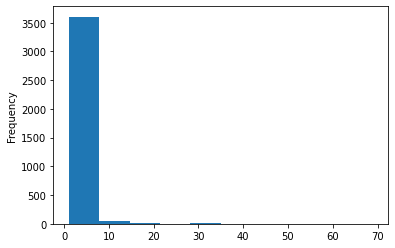

In [102]:
df['Author'].value_counts().plot(kind='hist')

In [103]:
df['Author'].value_counts()

Agatha Christie        69
Ladybird               49
DK                     48
Albert Uderzo          34
Herge                  34
                       ..
Kathryn Temple          1
David Landau            1
Richard L. Brandt       1
Makarand Waingankar     1
Gerry Conway            1
Name: Author, Length: 3679, dtype: int64

In [135]:
cnt=0
for i in df['Author'].value_counts():
    if i<15:
        cnt+=1

In [139]:
author_ser=df['Author'].value_counts()

In [132]:
df['Author'].value_counts()

69

In [147]:
author_list=[]

In [148]:
for i in range(0,len(df)):
    if author_ser[df.iloc[i]['Author']] >=10:
        author_list.append(df.iloc[i]['Author'])
    else:
        author_list.append('Other')

In [149]:
author_list=pd.Series(author_list)#.value_counts()

In [151]:
len(author_list.value_counts())

61

In [152]:
df

,Author,Synopsis,BookCategory,Price,Genre,year,stars,ratings
0,Chris Kuzneski,THE HUNTERS return in their third brilliant no...,Action & Adventure,220.00,Action & Adventure (Books),2016,4.0,8
1,Arun Khopkar,A layered portrait of a troubled genius for wh...,"Biographies, Diaries & True Accounts",202.93,Cinema & Broadcast (Books),2012,3.9,14
2,Thomas Hobbes,"""During the time men live without a common Pow...",Humour,299.00,International Relations,1982,4.8,6
3,Agatha Christie,A handful of grain is found in the pocket of a...,"Crime, Thriller & Mystery",180.00,Contemporary Fiction (Books),2017,4.1,13
4,Editors of Life,"For seven decades, ""Life"" has been thrilling t...","Arts, Film & Photography",965.62,Photography Textbooks,2006,5.0,1
...,...,...,...,...,...,...,...,...
6232,Tom Phillips,'F*cking brilliant' Sarah Knight\n'Very funny'...,Humour,322.00,Anthropology (Books),2018,5.0,2
6233,Stephenie Meyer,"In this gripping page-turner, an ex-agent on t...","Crime, Thriller & Mystery",421.00,Contemporary Fiction (Books),2016,3.3,9
6234,Julia Quinn,'The most refreshing and radiant love story yo...,Romance,399.00,Romance (Books),2006,3.8,3
6235,Amanda Hocking,Frostfire by Amanda Hocking is the stunning fi...,Action & Adventure,319.00,Action & Adventure (Books),2015,3.5,4


In [154]:
len(df['Genre'].value_counts())

87

In [164]:
new_ser=(df.groupby('Author')['Price'].mean()).sort_values(ascending=False)

In [163]:
author_ser['Rene Goscinny'] # Outlier hai kyuki iski count sirf one hai aur price bhut jyada

1

In [165]:
for i in new_ser.index:
    print(author_ser[i])
    print()

1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
2
1
1
1
1
1
1
1
1
3
1
1
1
1
1
1
1
2
1
2
1
1
1
1
1
1
2
1
1
1
1
1
8
1
1
1
1
1
1
1
1
2
1
2
1
1
1
1
1
1
1
1
4
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
2
1
1
1
3
1
1
2
4
1
3
1
1
1
1
1
1
1
6
1
1
1
1
7
1
2
1
1
1
2
3
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
2
2
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
3
1
1
2
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
2
1
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
2
1
1
1
1
1
1
1
1
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
9
1
1
1
14
1
1
1
1
2
1
1
1
1
2
1
1
1
1
1
1
1
1
1
5
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
7
2
4
1
2
3
2
5
1
3
1
1
1
1
1
1
1
1
1
1
1
4
1
1
1
1
1
1
2
3
1
1
1
1
1
1
2
1
2
1
2
1
1
1
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
10
1
3
1
3
2
1
1
1
1
1
1
1
2
1
1
1
2
2
1
1
1
3
1
2
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
1
1
15
1
1
1
1
1
2
1
1
1
1
1

In [169]:
cnt=0
cnt1=0
for i in author_ser:
    if i==1:
        cnt+=1
    else:
        cnt1+=i

In [171]:
cnt
Synopsis	BookCategory	Price	Genre	year	stars	ratings
0	THE HUNTERS return in their third brilliant no...	Action & Adventure	220.00	Action & Adventure (Books)	2016	4.0	8
1	A layered portrait of a troubled genius for wh...	Biographies, Diaries & True Accounts	202.93	Cinema & Broadcast (Books)	2012	3.9	14
2	"During the time men live without a common Pow...	Humour	299.00	International Relations	1982	4.8	6
3	A handful of grain is found in the pocket of a...	Crime, Thriller & Mystery	180.00	Contemporary Fiction (Books)	2017	4.1	13
4	For seven decades, "Life" has been thrilling t...	Arts, Film & Photography	965.62	Photography Textbooks	2006	5.0	1
...	...	...	...	...	...	...	...
6232	'F*cking brilliant' Sarah Knight\n'Very funny'...	Humour	322.00	Anthropology (Books)	2018	5.0	2
6233	In this gripping page-turner, an ex-agent on t...	Crime, Thriller & Mystery	421.00	Contemporary Fiction (Books)	2016	3.3	9
6234	'The most refreshing and radiant love story yo...	Romance	399.00	Romance (Books)	2006	3.8	3
6235	Frostfire by Amanda Hocking is the stunning fi...	Action & Adventure	319.00	Action & Adventure (Books)	2015	3.5	4
6236	Six years ago, Sam Capra watched his brother, ...	Action & Adventure	452.00	Action & Adventure (Books)	2016	3.9	2
6237 rows × 7 columns

2791

In [174]:
df['Author'].nunique()/len(df) ## 60% data alag hai

0.5898669232002566

In [175]:
df=df.drop('Author',axis=1)

In [176]:
df

,Synopsis,BookCategory,Price,Genre,year,stars,ratings
0,THE HUNTERS return in their third brilliant no...,Action & Adventure,220.00,Action & Adventure (Books),2016,4.0,8
1,A layered portrait of a troubled genius for wh...,"Biographies, Diaries & True Accounts",202.93,Cinema & Broadcast (Books),2012,3.9,14
2,"""During the time men live without a common Pow...",Humour,299.00,International Relations,1982,4.8,6
3,A handful of grain is found in the pocket of a...,"Crime, Thriller & Mystery",180.00,Contemporary Fiction (Books),2017,4.1,13
4,"For seven decades, ""Life"" has been thrilling t...","Arts, Film & Photography",965.62,Photography Textbooks,2006,5.0,1
...,...,...,...,...,...,...,...
6232,'F*cking brilliant' Sarah Knight\n'Very funny'...,Humour,322.00,Anthropology (Books),2018,5.0,2
6233,"In this gripping page-turner, an ex-agent on t...","Crime, Thriller & Mystery",421.00,Contemporary Fiction (Books),2016,3.3,9
6234,'The most refreshing and radiant love story yo...,Romance,399.00,Romance (Books),2006,3.8,3
6235,Frostfire by Amanda Hocking is the stunning fi...,Action & Adventure,319.00,Action & Adventure (Books),2015,3.5,4


In [177]:
test

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",4.4 out of 5 stars,960 customer reviews,A collection of entire body of work of the She...,Short Stories (Books),"Crime, Thriller & Mystery"
1,Learn Docker - Fundamentals of Docker 18.x: Ev...,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",5.0 out of 5 stars,1 customer review,Enhance your software deployment workflow usin...,Operating Systems Textbooks,"Computing, Internet & Digital Media"
2,Big Girl,Danielle Steel,"Paperback,– 17 Mar 2011",5.0 out of 5 stars,4 customer reviews,"'Watch out, world. Here I come!'\nFor Victoria...",Romance (Books),Romance
3,Think Python: How to Think Like a Computer Sci...,Allen B. Downey,"Paperback,– 2016",4.1 out of 5 stars,11 customer reviews,"If you want to learn how to program, working w...",Programming & Software Development (Books),"Computing, Internet & Digital Media"
4,Oxford Word Skills: Advanced - Idioms & Phrasa...,Redman Gairns,"Paperback,– 26 Dec 2011",4.4 out of 5 stars,9 customer reviews,"Learn and practise the verbs, prepositions and...",Linguistics (Books),"Language, Linguistics & Writing"
...,...,...,...,...,...,...,...,...
1555,100 Things Every Designer Needs to Know About ...,Susan Weinschenk,"Paperback,– 14 Apr 2011",5.0 out of 5 stars,4 customer reviews,We design to elicit responses from people. We ...,Design,"Computing, Internet & Digital Media"
1556,"Modern Letter Writing Course: Personal, Busine...",ARUN SAGAR,"Paperback,– 8 May 2013",3.6 out of 5 stars,13 customer reviews,"A 30-day course to write simple, sharp and att...",Children's Reference (Books),"Biographies, Diaries & True Accounts"
1557,The Kite Runner Graphic Novel,Khaled Hosseini,"Paperback,– 6 Sep 2011",4.0 out of 5 stars,5 customer reviews,The perennial bestseller-now available as a se...,Humour (Books),Humour
1558,Panzer Leader (Penguin World War II Collection),Heinz Guderian,"Paperback,– 22 Sep 2009",3.5 out of 5 stars,3 customer reviews,Heinz Guderian - master of the Blitzkrieg and ...,United States History,"Biographies, Diaries & True Accounts"


In [178]:
test=test.drop('Title',axis=1)

In [179]:
test

,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
0,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",4.4 out of 5 stars,960 customer reviews,A collection of entire body of work of the She...,Short Stories (Books),"Crime, Thriller & Mystery"
1,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",5.0 out of 5 stars,1 customer review,Enhance your software deployment workflow usin...,Operating Systems Textbooks,"Computing, Internet & Digital Media"
2,Danielle Steel,"Paperback,– 17 Mar 2011",5.0 out of 5 stars,4 customer reviews,"'Watch out, world. Here I come!'\nFor Victoria...",Romance (Books),Romance
3,Allen B. Downey,"Paperback,– 2016",4.1 out of 5 stars,11 customer reviews,"If you want to learn how to program, working w...",Programming & Software Development (Books),"Computing, Internet & Digital Media"
4,Redman Gairns,"Paperback,– 26 Dec 2011",4.4 out of 5 stars,9 customer reviews,"Learn and practise the verbs, prepositions and...",Linguistics (Books),"Language, Linguistics & Writing"
...,...,...,...,...,...,...,...
1555,Susan Weinschenk,"Paperback,– 14 Apr 2011",5.0 out of 5 stars,4 customer reviews,We design to elicit responses from people. We ...,Design,"Computing, Internet & Digital Media"
1556,ARUN SAGAR,"Paperback,– 8 May 2013",3.6 out of 5 stars,13 customer reviews,"A 30-day course to write simple, sharp and att...",Children's Reference (Books),"Biographies, Diaries & True Accounts"
1557,Khaled Hosseini,"Paperback,– 6 Sep 2011",4.0 out of 5 stars,5 customer reviews,The perennial bestseller-now available as a se...,Humour (Books),Humour
1558,Heinz Guderian,"Paperback,– 22 Sep 2009",3.5 out of 5 stars,3 customer reviews,Heinz Guderian - master of the Blitzkrieg and ...,United States History,"Biographies, Diaries & True Accounts"


In [180]:
test=test.drop('Author',axis=1)

In [181]:
test

,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
0,"Mass Market Paperback,– 1 Oct 1986",4.4 out of 5 stars,960 customer reviews,A collection of entire body of work of the She...,Short Stories (Books),"Crime, Thriller & Mystery"
1,"Paperback,– Import, 26 Apr 2018",5.0 out of 5 stars,1 customer review,Enhance your software deployment workflow usin...,Operating Systems Textbooks,"Computing, Internet & Digital Media"
2,"Paperback,– 17 Mar 2011",5.0 out of 5 stars,4 customer reviews,"'Watch out, world. Here I come!'\nFor Victoria...",Romance (Books),Romance
3,"Paperback,– 2016",4.1 out of 5 stars,11 customer reviews,"If you want to learn how to program, working w...",Programming & Software Development (Books),"Computing, Internet & Digital Media"
4,"Paperback,– 26 Dec 2011",4.4 out of 5 stars,9 customer reviews,"Learn and practise the verbs, prepositions and...",Linguistics (Books),"Language, Linguistics & Writing"
...,...,...,...,...,...,...
1555,"Paperback,– 14 Apr 2011",5.0 out of 5 stars,4 customer reviews,We design to elicit responses from people. We ...,Design,"Computing, Internet & Digital Media"
1556,"Paperback,– 8 May 2013",3.6 out of 5 stars,13 customer reviews,"A 30-day course to write simple, sharp and att...",Children's Reference (Books),"Biographies, Diaries & True Accounts"
1557,"Paperback,– 6 Sep 2011",4.0 out of 5 stars,5 customer reviews,The perennial bestseller-now available as a se...,Humour (Books),Humour
1558,"Paperback,– 22 Sep 2009",3.5 out of 5 stars,3 customer reviews,Heinz Guderian - master of the Blitzkrieg and ...,United States History,"Biographies, Diaries & True Accounts"
